# Part I.III - Obtain Google Play Reviews

In [1]:
## Import necessary libraries

# retrieves app info from App Store
from itunes_app_scraper.scraper import AppStoreScraper
# retrieves reviews from App Store
from app_store_scraper import AppStore

# retrieves app info AND reviews from Google Play
from google_play_scraper import app, Sort, reviews, reviews_all

# pretty print data structures
from pprint import pprint

# for storing in MongoDB
from pymongo import MongoClient

import datetime as dt
from tzlocal import get_localzone

import random
import time

import pandas as pd
import numpy as np

In [2]:
## Read in file containing app details, 
  ## need the app IDs for scraping stores
app_df = pd.read_csv('Data/mha_app_info.csv')
app_df.head()

,app_name,iOS,iOS_revs,iOS_app_name,iOS_app_id,android,android_revs,android_appID
0,Aloe Bud,1,3000,aloe-bud,1318382054,0,0,NaN
1,Aura,1,22100,aura-meditation-sleep,1114223104,1,10400,com.aurahealth
2,BetterHelp,1,32400,betterhelp-online-counseling,995252384,1,15300,com.betterhelp
3,Breathe2Relax,1,200,breathe2relax,425720246,1,1100,org.t2health.breathe2relax
4,Calm,1,1200000,calm,571800810,1,352500,com.calm.android


In [3]:
## Store list of app ids and names to loop through for Google Play
google_play_apps = app_df.copy()
google_play_apps = google_play_apps.loc[google_play_apps['android']==1]

google_play_names = list(google_play_apps['app_name'])
google_play_ids = list(google_play_apps['android_appID'])

In [5]:
## Check number of apps found in Google Play
len(google_play_ids)

47

## Set Up MongoDB for Project

In [6]:
## Set up Mongo client
client = MongoClient(host='localhost', port=27017)

In [7]:
## Database for project
mha_proj_db = client['mha_proj_db']

In [8]:
## Set up new collection within project db
google_play_rvws = mha_proj_db['google_play_rvws']

### Scrape Reviews from Google Play

In [20]:
for app_name, app_id in zip(google_play_names, google_play_ids):
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    app_reviews = []
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    count = 200
    batch_num = 0
    
    rvws, token = reviews(
        app_id,
        lang='en',
        country='us',
        sort=Sort.NEWEST,
        count=count
    )
    for r in rvws:
        r['app_name'] = app_name
        r['app_id'] = app_id
        
    app_reviews.extend(rvws)
    
    time.sleep(random.randint(10,20))
    
    batch_num +=1 
    print(f'Batch {batch_num} completed.')
    
    
    
    pre_review_ids = []
    for rvw in app_reviews:
        pre_review_ids.append(rvw['reviewId'])
    

    for batch in range(49):
        rvws, token = reviews(
            app_id,
            lang='en',
            country='us',
            sort=Sort.NEWEST,
            count=count,
            continuation_token=token
        )
        
        
        new_review_ids = []
        for r in rvws:
            new_review_ids.append(r['reviewId'])
            r['app_name'] = app_name
            r['app_id'] = app_id
     
        app_reviews.extend(rvws)
        
        batch_num +=1
        
        all_review_ids = pre_review_ids + new_review_ids
        if len(set(pre_review_ids)) == len(set(all_review_ids)):
            print(f'No reviews left to scrape. Completed {batch_num} batches.\n')
            break
        
        pre_review_ids = all_review_ids
        
        
        if batch_num%10==0:
            print(f'Batch {batch_num} completed.\n')
        
        time.sleep(random.randint(10,20))
        
    print(f'Done scraping {app_name}. Scraped a total of {len(set(pre_review_ids))} unique reviews.\n')
    
    
    # insert reviews into collection
    google_play_rvws.insert_many(app_reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(10,20))

------------------------------------------------------------
------------------------------------------------------------
***** Aura started at 03/16/21 - 13:04:06 PM

Batch 1 completed.
Batch 10 completed.

No reviews left to scrape. Completed 16 batches.

Done scraping Aura. Scraped a total of 2881 unique reviews.

Successfully inserted Aura reviews into collection at 03/16/21 - 13:07:55 PM.

Time elapsed for Aura: 0:03:49.506996
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** BetterHelp started at 03/16/21 - 13:08:09 PM

Batch 1 completed.
Batch 10 completed.

Batch 20 completed.

No reviews left to scrape. Completed 27 batches.

Done scraping BetterHelp. Scraped a total of 5083 unique reviews.

Successfully inserted BetterHelp reviews into collection at 03/16/21 - 13:15:01 PM.

Tim

Batch 1 completed.
No reviews left to scrape. Completed 6 batches.

Done scraping Happify. Scraped a total of 854 unique reviews.

Successfully inserted Happify reviews into collection at 03/16/21 - 13:59:59 PM.

Time elapsed for Happify: 0:01:22.526299
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** Happyfeed started at 03/16/21 - 14:00:14 PM

Batch 1 completed.
No reviews left to scrape. Completed 2 batches.

Done scraping Happyfeed. Scraped a total of 118 unique reviews.

Successfully inserted Happyfeed reviews into collection at 03/16/21 - 14:00:32 PM.

Time elapsed for Happyfeed: 0:00:17.830927
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
----

No reviews left to scrape. Completed 3 batches.

Done scraping PTSD Coach. Scraped a total of 335 unique reviews.

Successfully inserted PTSD Coach reviews into collection at 03/16/21 - 15:05:25 PM.

Time elapsed for PTSD Coach: 0:00:22.779759
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** Reflectly started at 03/16/21 - 15:05:35 PM

Batch 1 completed.
Batch 10 completed.

Batch 20 completed.

Batch 30 completed.

Batch 40 completed.

Batch 50 completed.

Done scraping Reflectly. Scraped a total of 10000 unique reviews.

Successfully inserted Reflectly reviews into collection at 03/16/21 - 15:18:17 PM.

Time elapsed for Reflectly: 0:12:41.532816
------------------------------------------------------------
------------------------------------------------------------


-----------------

Batch 1 completed.
No reviews left to scrape. Completed 3 batches.

Done scraping Virtual Hope Box. Scraped a total of 257 unique reviews.

Successfully inserted Virtual Hope Box reviews into collection at 03/16/21 - 16:10:49 PM.

Time elapsed for Virtual Hope Box: 0:00:27.096703
------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------
***** What's Up? started at 03/16/21 - 16:11:04 PM

Batch 1 completed.
No reviews left to scrape. Completed 6 batches.

Done scraping What's Up?. Scraped a total of 946 unique reviews.

Successfully inserted What's Up? reviews into collection at 03/16/21 - 16:12:28 PM.

Time elapsed for What's Up?: 0:01:23.906198
------------------------------------------------------------
------------------------------------------------------------


----------------------------------

In [44]:
gp_rvw_df = pd.DataFrame(list(google_play_rvws.find({})))
gp_rvw_df.head()

,_id,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
0,6050e5eb0501b05de2c92a2c,gp:AOqpTOFtkNhWdwbleI9axJOjlT7t6pQwVJ7t6slRYB-...,Julie L. Diaz,https://play-lh.googleusercontent.com/a-/AOh14...,Great way to decompress and start your day!,5,0,2.4.2,2021-03-16 11:13:36,None,NaT,Aura,com.aurahealth
1,6050e5eb0501b05de2c92a2d,gp:AOqpTOFEiK76RQn3IT_l33057YhZTiJG5-2CHqSjhau...,Brieanna Leader,https://play-lh.googleusercontent.com/a-/AOh14...,This app is a great way to express your though...,5,0,2.4.2,2021-03-15 12:57:44,None,NaT,Aura,com.aurahealth
2,6050e5eb0501b05de2c92a2e,gp:AOqpTOGvtXXTIO5iLmumGGEWYEoSHsf9bnR9CIqVeVL...,Raelene Bennett,https://play-lh.googleusercontent.com/a-/AOh14...,Easy to use short and practical,5,0,2.4.2,2021-03-14 14:19:41,None,NaT,Aura,com.aurahealth
3,6050e5eb0501b05de2c92a2f,gp:AOqpTOEsycUO6F1EtiLx-Lc4JQYizxEEVfQz3DeVScN...,adam rivera,https://play-lh.googleusercontent.com/-_etwUFT...,The greatest! Feeling,5,0,2.4.2,2021-03-13 19:57:50,None,NaT,Aura,com.aurahealth
4,6050e5eb0501b05de2c92a30,gp:AOqpTOG82BmVA1oTLV3Hjjhol7CfnTD6Uq-KTlWVaYw...,Jeanne Macdonald,https://play-lh.googleusercontent.com/-M5HNH1c...,It has a beautiful flowing qualify.,5,0,2.4.2,2021-03-13 16:30:24,Thank you very much for your 5-star review!!! ...,2021-03-09 18:47:18,Aura,com.aurahealth


In [45]:
## Check total number of reviews scraped and stored in collection
len(gp_rvw_df)

153850

In [46]:
## Check number of unique reviews stored in collection
gp_rvw_df['reviewId'].nunique()

146542

In [47]:
## Total of 7308 duplicate reviews in collection
len(gp_rvw_df) - gp_rvw_df['reviewId'].nunique()

7308

In [48]:
## Drop duplicate reviews
gp_rvw_df = gp_rvw_df.drop(columns=['_id'])
gp_rvw_df = gp_rvw_df.drop_duplicates(['reviewId'])
print(len(gp_rvw_df))
gp_rvw_df['reviewId'].nunique()

146542


146542

In [61]:
## Check number of reviews of each score
gp_rvw_df['score'].value_counts()

5    99201
4    18284
1    17135
3     6926
2     4994
0        2
Name: score, dtype: int64

In [62]:
## Investigate reviews with score of 0
gp_rvw_df.loc[gp_rvw_df['score']==0]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
21951,lg:AOqpTOGsj_LVg67dhWdCAq9tKTZc0-0XEVJg2XDecQk...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Is there a way to use this app for two people?...,0,0,1.0,2011-02-03 22:06:42,None,NaT,eMoods,my.tracker
21969,lg:AOqpTOEGU8eCnOPE2e4R9OySOzvjPBpxOjOzkNLBLqI...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Would be nice to have a symbol for the levels ...,0,0,1.0,2010-12-18 21:32:30,None,NaT,eMoods,my.tracker


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

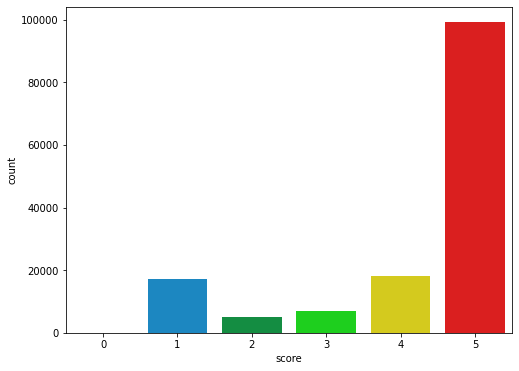

In [60]:
## Plot distribution of review scores
plt.figure(figsize=(8,6))
g = sns.countplot(data=gp_rvw_df, x='score', palette='nipy_spectral');

In [66]:
import datetime as dt

In [67]:
## Check which apps had so many reviews that they were
  ## cut off at 10,000 (or so new -- GG Self Care) such that earliest review 
  ## doesn't go all the way back to March 2020
for app in gp_rvw_df['app_name'].unique():
    
    earliest_rvw = min(gp_rvw_df.loc[gp_rvw_df['app_name']==app]['at'])
    
    if earliest_rvw > dt.datetime(2020, 2, 28): 
    
        print(f"""Earliest review for {app}: 
            {min(gp_rvw_df.loc[gp_rvw_df['app_name']==app]['at'])}\n""")

Earliest review for Calm: 
            2020-07-09 18:04:41

Earliest review for Fabulous: 
            2020-07-27 06:54:46

Earliest review for GG Self Care: 
            2020-03-20 23:44:00

Earliest review for Headspace: 
            2020-07-02 20:07:49

Earliest review for Insight Timer: 
            2020-04-01 18:54:58

Earliest review for Wysa: 
            2020-06-30 19:56:58



In [74]:
temp_dict = {}

for app in gp_rvw_df['app_name'].unique():
    
    app_slice = gp_rvw_df.loc[gp_rvw_df['app_name']==app].copy()
    
    cutoff_date = dt.datetime(2020, 2, 28)
    
    count_from_Mar2020 = len(app_slice.loc[app_slice['at']>cutoff_date])
    
    temp_dict[app] = count_from_Mar2020
    
app_Mar2020 = pd.DataFrame.from_dict(temp_dict, orient='index')
app_Mar2020.reset_index(drop=False, inplace=True)
app_Mar2020.columns = ['app_name', 'num_rvws_since_Mar2020']
app_Mar2020

,app_name,num_rvws_since_Mar2020
0,Aura,839
1,BetterHelp,2305
2,Breathe2Relax,33
3,Calm,10000
4,CBT Thought Diary,494
5,DBT Coach,180
6,eMoods,86
7,eQuoo: Emotional Fitness Game,663
8,Fabulous,10000
9,GG OCD,31


In [75]:
client.close()

In [16]:
gp2_test_collection = mha_proj_db['gp2_test_collection']

In [17]:
for app_name, app_id in [('Breathe2Relax', 'org.t2health.breathe2relax'),
                         ('CBT Thought Diary', 'com.moodtools.cbtassistant.app')]:
    
    test_reviews = []
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    count = 200
    batch_num = 0
    
    rvws, token = reviews(
        app_id,
        lang='en',
        country='us',
        sort=Sort.NEWEST,
        count=count
    )
    for r in rvws:
        r['app_name'] = app_name
        r['app_id'] = app_id
        
    test_reviews.extend(rvws)
    
    time.sleep(random.randint(10,20))
    
    batch_num +=1 
    print(f'Batch {batch_num} completed.')
    
    
    
    pre_review_ids = []
    for rvw in test_reviews:
        pre_review_ids.append(rvw['reviewId'])
    

    for batch in range(49):
        rvws, token = reviews(
            app_id,
            lang='en',
            country='us',
            sort=Sort.NEWEST,
            count=count,
            continuation_token=token
        )
        
        
        new_review_ids = []
        for r in rvws:
            new_review_ids.append(r['reviewId'])
            r['app_name'] = app_name
            r['app_id'] = app_id
     
        test_reviews.extend(rvws)
        
        batch_num +=1
        
        all_review_ids = pre_review_ids + new_review_ids
        if len(set(pre_review_ids)) == len(set(all_review_ids)):
            print(f'No reviews left to scrape. Completed {batch_num} batches.\n')
            break
        
        pre_review_ids = all_review_ids
        
        
        if batch_num%10==0:
            print(f'Batch {batch_num} completed.\n')
        
        time.sleep(random.randint(10,20))
        
    print(f'Done scraping {app_name}. Scraped a total of {len(set(pre_review_ids))} unique reviews.\n')
    
    
    # insert reviews into collection
    gp2_test_collection.insert_many(test_reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('---'*20)
    print('\n')
    
    time.sleep(random.randint(10,20))

------------------------------------------------------------
***** Breathe2Relax started at 03/16/21 - 12:49:08 PM

Batch 1 completed.
No reviews left to scrape. Completed 3 batches.

Done scraping Breathe2Relax. Scraped a total of 304 reviews.

Successfully inserted Breathe2Relax reviews into collection at 03/16/21 - 12:49:49 PM.

Time elapsed for Breathe2Relax: 0:00:40.509556
------------------------------------------------------------


------------------------------------------------------------
***** CBT Thought Diary started at 03/16/21 - 12:50:05 PM

Batch 1 completed.
No reviews left to scrape. Completed 5 batches.

Done scraping CBT Thought Diary. Scraped a total of 757 reviews.

Successfully inserted CBT Thought Diary reviews into collection at 03/16/21 - 12:51:06 PM.

Time elapsed for CBT Thought Diary: 0:01:01.001957
------------------------------------------------------------




In [11]:
test_df = pd.DataFrame(list(gp_test_collection.find({})))
test_df

,_id,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
0,6050dffe0501b05de2c91ec2,gp:AOqpTOFds8u_L07dpTGzHATsL1r1wbbJFgLA5QEj41E...,Steve Loos,https://play-lh.googleusercontent.com/a-/AOh14...,Why should I have to log in with a password to...,1,0,None,2021-03-15 15:02:24,None,NaT,Breathe2Relax,org.t2health.breathe2relax
1,6050dffe0501b05de2c91ec3,gp:AOqpTOE0YbG3Dw13KBulI0JR0-ANk9WzpnLY3Xv2DWQ...,Poisson Bracket,https://play-lh.googleusercontent.com/-Lbc5PXq...,So simple to use. Anything overly complicated ...,5,4,3.5.1.20200304,2021-01-07 05:48:39,None,NaT,Breathe2Relax,org.t2health.breathe2relax
2,6050dffe0501b05de2c91ec4,gp:AOqpTOFj1Ug1Vw9XPFu32QcX17GAWxCK-tATBn3hequ...,Rosie Tobin-Moss,https://play-lh.googleusercontent.com/-poZvI7I...,Can't even set the app up because the save but...,1,0,3.5.1.20200304,2020-10-16 05:45:05,None,NaT,Breathe2Relax,org.t2health.breathe2relax
3,6050dffe0501b05de2c91ec5,gp:AOqpTOGEj9oOjM64vm0WPjU2NX_1LPgsZVI5ZhxaoeZ...,Sheila Carter,https://play-lh.googleusercontent.com/-ssI23W1...,I can't get past the 2nd security question to ...,1,7,3.5.1.20200304,2020-10-14 05:35:04,None,NaT,Breathe2Relax,org.t2health.breathe2relax
4,6050dffe0501b05de2c91ec6,gp:AOqpTOG7-iOrhiD793F1oB-i031j7n6juSk3QYGbQI4...,J. Mathews,https://play-lh.googleusercontent.com/a-/AOh14...,I can't even start an account because the app ...,1,10,3.5.1.20200304,2020-10-09 16:23:21,None,NaT,Breathe2Relax,org.t2health.breathe2relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6050e0440501b05de2c92472,gp:AOqpTOEhG6eYkm-O2vuWgWQomoOKjrHRJqkwgCvYXTv...,Tionne Cherae,https://play-lh.googleusercontent.com/a-/AOh14...,"I have BPD, everytime I have a episode I write...",3,1,4.1.5,2020-07-27 04:51:13,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1457,6050e0440501b05de2c92473,gp:AOqpTOHpl-IT15xvHFrcH0MtiFgOWOynnRGzVHNEu2m...,katie kohler,https://play-lh.googleusercontent.com/-JL3vod1...,I've gotten a lot of value out of this app. It...,4,3,4.1.5,2020-07-26 20:47:14,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1458,6050e0440501b05de2c92474,gp:AOqpTOHvrDuPlgW0HwCMuI85jrtiEola7Gud61r42JB...,Sophie Kennish,https://play-lh.googleusercontent.com/-2pcXR_b...,Really good for people interested in cognitive...,5,3,4.1.5,2020-07-26 17:54:20,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1459,6050e0440501b05de2c92475,gp:AOqpTOH_6l-39PtWqux8LMeHd9mYqXNl5vnoxXsGzve...,zombabe Therese,https://play-lh.googleusercontent.com/-KSPkq8N...,"Good app, I like the simplicity of it because ...",3,5,4.1.5,2020-07-26 15:12:17,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app


In [12]:
test_df['app_name'].value_counts()

CBT Thought Diary    957
Breathe2Relax        504
Name: app_name, dtype: int64

In [13]:
b2r_test_slice = test_df.copy()
b2r_test_slice = b2r_test_slice.groupby('app_name').get_group('Breathe2Relax')
b2r_test_slice['reviewId'].nunique()

304

In [14]:
cbt_test_slice = test_df.copy()
cbt_test_slice = cbt_test_slice.groupby('app_name').get_group('CBT Thought Diary')
cbt_test_slice['reviewId'].nunique()

757

In [18]:
test_df_2 = pd.DataFrame(list(gp2_test_collection.find({})))
test_df_2

,_id,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
0,6050e1ac0501b05de2c92477,gp:AOqpTOFds8u_L07dpTGzHATsL1r1wbbJFgLA5QEj41E...,Steve Loos,https://play-lh.googleusercontent.com/a-/AOh14...,Why should I have to log in with a password to...,1,0,None,2021-03-15 15:02:24,None,NaT,Breathe2Relax,org.t2health.breathe2relax
1,6050e1ac0501b05de2c92478,gp:AOqpTOE0YbG3Dw13KBulI0JR0-ANk9WzpnLY3Xv2DWQ...,Poisson Bracket,https://play-lh.googleusercontent.com/-Lbc5PXq...,So simple to use. Anything overly complicated ...,5,4,3.5.1.20200304,2021-01-07 05:48:39,None,NaT,Breathe2Relax,org.t2health.breathe2relax
2,6050e1ac0501b05de2c92479,gp:AOqpTOFj1Ug1Vw9XPFu32QcX17GAWxCK-tATBn3hequ...,Rosie Tobin-Moss,https://play-lh.googleusercontent.com/-poZvI7I...,Can't even set the app up because the save but...,1,0,3.5.1.20200304,2020-10-16 05:45:05,None,NaT,Breathe2Relax,org.t2health.breathe2relax
3,6050e1ac0501b05de2c9247a,gp:AOqpTOGEj9oOjM64vm0WPjU2NX_1LPgsZVI5ZhxaoeZ...,Sheila Carter,https://play-lh.googleusercontent.com/-ssI23W1...,I can't get past the 2nd security question to ...,1,7,3.5.1.20200304,2020-10-14 05:35:04,None,NaT,Breathe2Relax,org.t2health.breathe2relax
4,6050e1ac0501b05de2c9247b,gp:AOqpTOG7-iOrhiD793F1oB-i031j7n6juSk3QYGbQI4...,J. Mathews,https://play-lh.googleusercontent.com/a-/AOh14...,I can't even start an account because the app ...,1,10,3.5.1.20200304,2020-10-09 16:23:21,None,NaT,Breathe2Relax,org.t2health.breathe2relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6050e1fa0501b05de2c92a27,gp:AOqpTOEhG6eYkm-O2vuWgWQomoOKjrHRJqkwgCvYXTv...,Tionne Cherae,https://play-lh.googleusercontent.com/a-/AOh14...,"I have BPD, everytime I have a episode I write...",3,1,4.1.5,2020-07-27 04:51:13,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1457,6050e1fa0501b05de2c92a28,gp:AOqpTOHpl-IT15xvHFrcH0MtiFgOWOynnRGzVHNEu2m...,katie kohler,https://play-lh.googleusercontent.com/-JL3vod1...,I've gotten a lot of value out of this app. It...,4,3,4.1.5,2020-07-26 20:47:14,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1458,6050e1fa0501b05de2c92a29,gp:AOqpTOHvrDuPlgW0HwCMuI85jrtiEola7Gud61r42JB...,Sophie Kennish,https://play-lh.googleusercontent.com/-2pcXR_b...,Really good for people interested in cognitive...,5,3,4.1.5,2020-07-26 17:54:20,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app
1459,6050e1fa0501b05de2c92a2a,gp:AOqpTOH_6l-39PtWqux8LMeHd9mYqXNl5vnoxXsGzve...,zombabe Therese,https://play-lh.googleusercontent.com/-KSPkq8N...,"Good app, I like the simplicity of it because ...",3,5,4.1.5,2020-07-26 15:12:17,None,NaT,CBT Thought Diary,com.moodtools.cbtassistant.app


In [19]:
test_df_2['app_name'].value_counts()

CBT Thought Diary    957
Breathe2Relax        504
Name: app_name, dtype: int64